In [ ]:
# import sys
# sys.path.append("/cluster/home/futing/Project/GBM/HiC/11SV/NeoLoopFinder-master")
# from neoloop.visualize.core import * 
# import cooler
# !pwd

In [1]:
import sys
import cooler
import pandas as pd
sys.path.insert(0, '/cluster/home/futing/Project/GBM/HiC/11SV/NeoLoopFinder-master')

import neoloop.visualize.core as core
print(dir(core))


['Elements', 'Genes', 'GenomicRegionPlot', 'GridSpec', 'LinearSegmentedColormap', 'LogNorm', 'Loops', 'Peakachu', 'SigTrack', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', 'complexSV', 'file', 'font_files', 'font_manager', 'itertools', 'matplotlib', 'neoloop', 'new_rc_params', 'np', 'os', 'plotGenes', 'plotSignal', 'plot_exp', 'plt', 'sparse']


In [19]:
gene = '/cluster/home/futing/ref_genome/hg38_gencode/genebed/gencode.v43.annotation.gtf'
cell_paths = {
    "NHA": {
        "hic": "/cluster/home/futing/Project/GBM/HiC/02data/03cool_order/10000/astro_merge_10000.cool",
        "RNA": "/cluster/home/futing/Project/GBM/RNA/sample/20240830/analysis/NHA/NHA_RPKM.bw",
        "loops": "/cluster/home/futing/Project/GBM/HiC/UCSC/NHA/data/NHA.links",
        "H3K27ac": "/cluster/home/futing/Project/GBM/ChIP/H3K27ac/NHA3/bigwig/SRR25404260_input.bw"
    },
    "GBM": {
        "hic": "/cluster/home/futing/Project/GBM/HiC/02data/03cool_order/10000/GBM_10000.cool",
        "RNA": "/cluster/home/futing/Project/GBM/RNA/sample/20240830/analysis/U87/U87_RPKM.bw",
        "loops": "/cluster/home/futing/Project/GBM/HiC/UCSC/GBM/data/GBM.links",
        "H3K27ac": "/cluster/home/futing/Project/GBM/ChIP/H3K27ac/U87_new/bigwig/SRR14862242_input.bw"
    },
    "NPC": {
        "hic": "/cluster/home/futing/Project/GBM/HiC/02data/03cool_order/10000/NPC_merge_10000.cool",
        "RNA": "/cluster/home/futing/Project/GBM/RNA/sample/NPC/NPC_RPKM.bw",
        "loops": "/cluster/home/futing/Project/GBM/HiC/UCSC/NPC/data/NPC.links",
        "H3K27ac": "/cluster/home/futing/Project/GBM/ChIP/H3K27ac/NPC2/bigwig/SRR17882758_input.bw"
    }
}

# 使用示例
cell = "NPC"
print(cell_paths[cell]["H3K27ac"])  # 输出 NPC 的 H3K27ac 路径

/cluster/home/futing/Project/GBM/ChIP/H3K27ac/NPC2/bigwig/SRR17882758_input.bw


In [3]:
genedir='/cluster/home/futing/Project/GBM/HiC/HAR/HARs_gene/genes'
HARregion = pd.read_csv(f'{genedir}/HARregion/GBMvsNPC/HARregion_GBMvsNPC_RNAbygenes.txt', sep='\t',index_col=0)
HARregion.columns = ['HAR','chr', 'start', 'end', 'gene']

In [ ]:
df=HARregion.iloc[1,:]
region = df['chr']+':'+str(df['start'])+'-'+str(df['end'])
genes = [g.strip() for g in df['gene'].split(',')]  # S
gene_list = list(set(genes))  # Convert to unique list (optional)
s = df['HAR']
parts = s.split("_")
result = (parts[0], int(parts[1]), int(parts[2]))

cell = 'NPC'

In [ ]:
def plot_hic(cell,df,save=False):
	'''
	cell_path是一个字典，储存了所有路径信息
	'''
	region = df['chr']+':'+str(df['start'])+'-'+str(df['end'])
	genes = [g.strip() for g in df['gene'].split(',')]  # S
	gene_list = list(set(genes))  # Convert to unique list (optional)
	s = df['HAR']
	parts = s.split("_")
	result = (parts[0], int(parts[1]), int(parts[2]))

	print(f'Plotting {cell} for {s} at {region}...')
	clr = cooler.Cooler(f'/cluster/home/futing/Project/GBM/HiC/02data/03cool_order/10000/{cell}_10000.cool')
	# Create the visualization
	vis = core.GenomicRegionPlot(clr, region, figsize=(7, 5.8),
				track_partition=[5, 0.8, 0.8, 0.3,0.5, 0.5],n_rows=6, correct=True)
	# custom_cmap = LinearSegmentedColormap.from_list('custom_cmap', ['#1065ad', 'white', '#bc020f'])
	vis.matrix_plot(vmin=1e-03,vmax=5e-02) #,colormap=custom_cmap)

	vis.plot_signal('H3K27ac', cell_paths[cell]["H3K27ac"], label_size=10, data_range_size=9, max_value='auto', color='#6A3D9A')
	vis.plot_signal('RNA', cell_paths[cell]["RNA"], label_size=10, data_range_size=9,  max_value='auto', color='#E31A1C')
	vis.plot_loops(cell_paths[cell]["loops"], face_color='none', marker_size=40)
	vis.plot_chromosome_bounds(linewidth=2)
	vis.plot_genes(filter_=gene_list,fontsize=9) #, label_aligns={'MYC':'right'}
	vis.plot_arcs(lw=1.5, cutoff='top', gene_filter=gene_list, arc_color='#666666')
	vis.plot_chromosome_bar(name_size=10, coord_size=9)
	vis.plot_vlines(result, color='blue', linewidth=1)
	# vis.outfig(f'{workdir}/{s}_{cell}_1k.region.pdf',dpi=500)
	if save:
		vis.outfig(f'/cluster/home/futing/Project/GBM/HiC/HAR/plot/heatmap/{s}_{cell}.pdf', dpi=300)

Plotting NPC for chr10_24728545_24728698 at chr10:24718545-25036664...
SigTrack.stats output length: 500
SigTrack.stats output length: 500
Raw scores_per_bin length: 500
SigTrack.stats output length: 500
SigTrack.stats output length: 500
Raw scores_per_bin length: 500
Found 4 loops to plot
Example loops: [((0, 15), 2.0), ((0, 24), 2.0), ((0, 29), 2.0)]


INFO:pyensembl.sequence_data:Loaded sequence dictionary from /cluster/home/futing/.cache/pyensembl/GRCh38/ensembl97/Homo_sapiens.GRCh38.cdna.all.fa.gz.pickle
INFO:pyensembl.sequence_data:Loaded sequence dictionary from /cluster/home/futing/.cache/pyensembl/GRCh38/ensembl97/Homo_sapiens.GRCh38.ncrna.fa.gz.pickle
INFO:pyensembl.sequence_data:Loaded sequence dictionary from /cluster/home/futing/.cache/pyensembl/GRCh38/ensembl97/Homo_sapiens.GRCh38.pep.all.fa.gz.pickle
INFO:pyensembl.sequence_data:Loaded sequence dictionary from /cluster/home/futing/.cache/pyensembl/GRCh38/ensembl97/Homo_sapiens.GRCh38.cdna.all.fa.gz.pickle
INFO:pyensembl.sequence_data:Loaded sequence dictionary from /cluster/home/futing/.cache/pyensembl/GRCh38/ensembl97/Homo_sapiens.GRCh38.ncrna.fa.gz.pickle
INFO:pyensembl.sequence_data:Loaded sequence dictionary from /cluster/home/futing/.cache/pyensembl/GRCh38/ensembl97/Homo_sapiens.GRCh38.pep.all.fa.gz.pickle
INFO:fontTools.subset:maxp pruned
INFO:fontTools.subset:LTSH

Plotting NPC for chr10_35949492_35950111 at chr10:35628246-35960111...
SigTrack.stats output length: 500
SigTrack.stats output length: 500
Raw scores_per_bin length: 500
SigTrack.stats output length: 500
SigTrack.stats output length: 500
Raw scores_per_bin length: 500
Found 2 loops to plot
Example loops: [((1, 27), 1.0), ((1, 31), 1.0)]


INFO:pyensembl.sequence_data:Loaded sequence dictionary from /cluster/home/futing/.cache/pyensembl/GRCh38/ensembl97/Homo_sapiens.GRCh38.cdna.all.fa.gz.pickle
INFO:pyensembl.sequence_data:Loaded sequence dictionary from /cluster/home/futing/.cache/pyensembl/GRCh38/ensembl97/Homo_sapiens.GRCh38.ncrna.fa.gz.pickle
INFO:pyensembl.sequence_data:Loaded sequence dictionary from /cluster/home/futing/.cache/pyensembl/GRCh38/ensembl97/Homo_sapiens.GRCh38.pep.all.fa.gz.pickle
INFO:pyensembl.sequence_data:Loaded sequence dictionary from /cluster/home/futing/.cache/pyensembl/GRCh38/ensembl97/Homo_sapiens.GRCh38.cdna.all.fa.gz.pickle
INFO:pyensembl.sequence_data:Loaded sequence dictionary from /cluster/home/futing/.cache/pyensembl/GRCh38/ensembl97/Homo_sapiens.GRCh38.ncrna.fa.gz.pickle
INFO:pyensembl.sequence_data:Loaded sequence dictionary from /cluster/home/futing/.cache/pyensembl/GRCh38/ensembl97/Homo_sapiens.GRCh38.pep.all.fa.gz.pickle
INFO:fontTools.subset:maxp pruned
INFO:fontTools.subset:LTSH

1    None
2    None
dtype: object

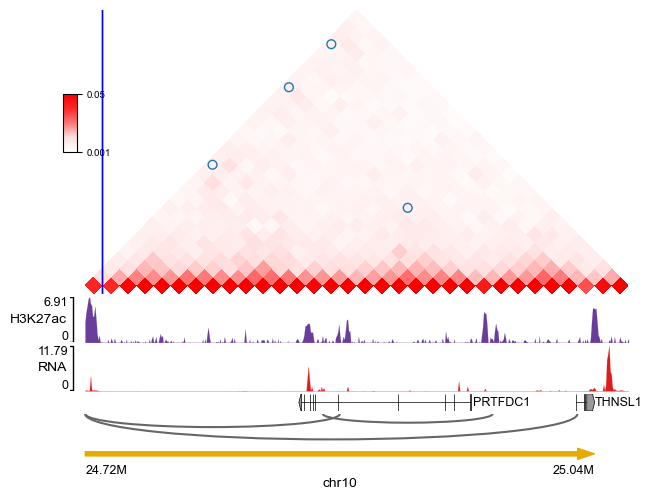

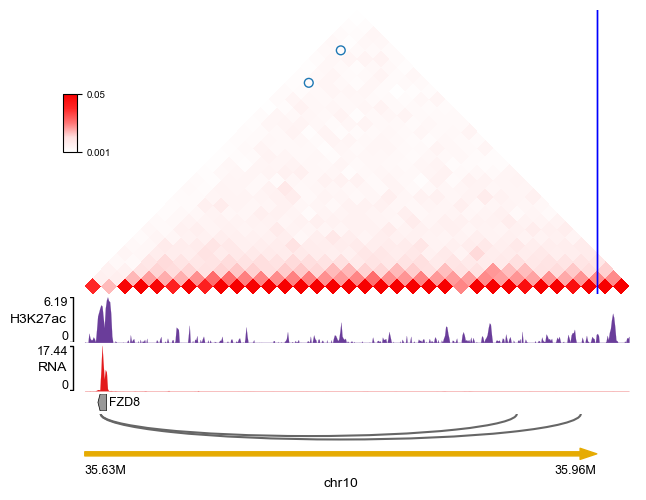

In [30]:
HARregion.iloc[[1,2],:].apply(lambda x: plot_hic(cell,x,save=True), axis=1)	

SigTrack.stats output length: 500
SigTrack.stats output length: 500
Raw scores_per_bin length: 500
SigTrack.stats output length: 500
SigTrack.stats output length: 500
Raw scores_per_bin length: 500
Found 2 loops to plot
Example loops: [((0, 14), 4.0), ((0, 23), 4.0)]


INFO:pyensembl.sequence_data:Loaded sequence dictionary from /cluster/home/futing/.cache/pyensembl/GRCh38/ensembl97/Homo_sapiens.GRCh38.cdna.all.fa.gz.pickle
INFO:pyensembl.sequence_data:Loaded sequence dictionary from /cluster/home/futing/.cache/pyensembl/GRCh38/ensembl97/Homo_sapiens.GRCh38.ncrna.fa.gz.pickle
INFO:pyensembl.sequence_data:Loaded sequence dictionary from /cluster/home/futing/.cache/pyensembl/GRCh38/ensembl97/Homo_sapiens.GRCh38.pep.all.fa.gz.pickle
INFO:pyensembl.sequence_data:Loaded sequence dictionary from /cluster/home/futing/.cache/pyensembl/GRCh38/ensembl97/Homo_sapiens.GRCh38.cdna.all.fa.gz.pickle
INFO:pyensembl.sequence_data:Loaded sequence dictionary from /cluster/home/futing/.cache/pyensembl/GRCh38/ensembl97/Homo_sapiens.GRCh38.ncrna.fa.gz.pickle
INFO:pyensembl.sequence_data:Loaded sequence dictionary from /cluster/home/futing/.cache/pyensembl/GRCh38/ensembl97/Homo_sapiens.GRCh38.pep.all.fa.gz.pickle


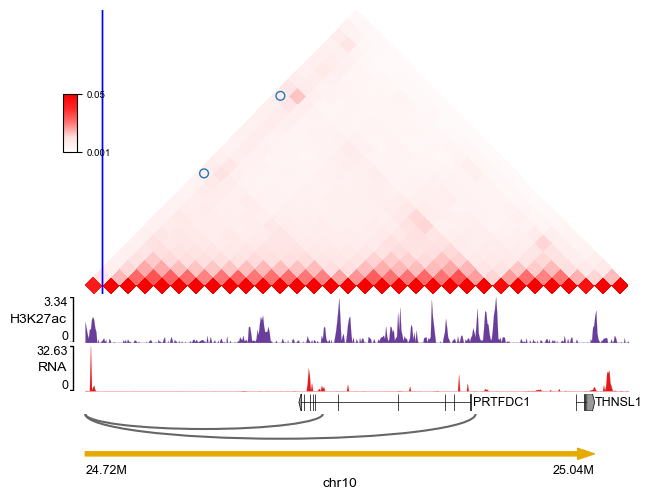

In [18]:
import cooler
from matplotlib.colors import LinearSegmentedColormap
workdir = '/cluster/home/futing/Project/GBM/HiC/11SV/NeoLoopFinder-master/'
# gene_list = [line.strip() for lisne in open('/cluster/home/futing/Project/GBM/HiC/11SV/eaglec_new/result/EP_neoloop/all-genes.txt')]
# Instead of assembly, just specify the genomic region
# region = "chr12:88039015-90965176"
# gene='KITLG'
# gene_list = [gene]
# s = "chr12_89349788_89350164"
# parts = s.split("_")
# result = (parts[0], int(parts[1]), int(parts[2]))
cell='GBM'
clr = cooler.Cooler(f'/cluster/home/futing/Project/GBM/HiC/02data/03cool_order/10000/{cell}_10000.cool')
# Create the visualization
vis = core.GenomicRegionPlot(clr, region, figsize=(7, 5.8),
			track_partition=[5, 0.8, 0.8, 0.3,0.5, 0.5],n_rows=6, correct=True)
# custom_cmap = LinearSegmentedColormap.from_list('custom_cmap', ['#1065ad', 'white', '#bc020f'])
vis.matrix_plot(vmin=1e-03,vmax=5e-02) #,colormap=custom_cmap)

vis.plot_signal('H3K27ac', GBM_H3K27ac, label_size=10, data_range_size=9, max_value='auto', color='#6A3D9A')
vis.plot_signal('RNA', GBM_RNA, label_size=10, data_range_size=9,  max_value='auto', color='#E31A1C')
vis.plot_loops(f'/cluster/home/futing/Project/GBM/HiC/UCSC/{cell}/data/{cell}.links', face_color='none', marker_size=40)
vis.plot_chromosome_bounds(linewidth=2)
vis.plot_genes(filter_=gene_list,fontsize=9) #, label_aligns={'MYC':'right'}
vis.plot_arcs(lw=1.5, cutoff='top', gene_filter=gene_list, arc_color='#666666')
vis.plot_chromosome_bar(name_size=10, coord_size=9)
vis.plot_vlines(result, color='blue', linewidth=1)
# vis.outfig(f'{workdir}/{s}_{cell}_1k.region.pdf',dpi=500)


In [ ]:
from pyensembl import EnsemblRelease

# 下载并索引 Ensembl 数据库
data = EnsemblRelease(release=97, species='human')
# data.download()
# data.index()
gene = data.genes_by_name("SOX2")
print(gene)

In [ ]:

workdir = '/cluster/home/futing/Project/GBM/HiC/11SV/NeoLoopFinder-master/'
clr = cooler.Cooler(f'{workdir}/SKNMC-MboI-allReps-filtered.mcool::resolutions/5000')
assembly = 'C16 deletion,8,127880000,+,8,129375000,-    8,126215000     8,130125000'
vis = Triangle(clr, assembly, n_rows=3, figsize=(7, 4.2),
track_partition=[5, 0.4, 0.5], correct='sweight', span=500000,
slopes={(0,0):1, (0,1):0.3, (1,1):1})
vis.matrix_plot(vmin=0)
vis.plot_chromosome_bounds(linewidth=2)
vis.plot_loops(f'{workdir}/SKNMC.neo-loops.txt', face_color='none', marker_size=40,
    cluster=False, filter_by_res=True, onlyneo=True)
vis.plot_genes(filter_=['MYC', 'PVT1'],label_aligns={'MYC':'right'}, fontsize=9)
vis.plot_chromosome_bar(name_size=10, coord_size=9)
vis.outfig(f'{workdir}/SKNMC.C16.pdf')